# Know it before it happens: potential factors associated with suicide

## A. Business understanding
#### This project aims to explore the potential factors that might be associated with suicide

In this project, I am intereted in the following questions:

- How does the world suicide rates change across 30 years?
- Differences between females and males in suicide rates.
- How does the age affect suicide rates?
- Is there any relationship between suicide rates and other numerical variable?
- Which factors are the best predictors of suicide rates?


## B. Data understanding

I used the dataset of suicide rates overview 1985 to 2016 provides by Kaggle for the current project.

- The data is clean, and there is not many missing data, except the HDI.
- It includes the world-wide suicide rates from 1985 to 2016, which provides a good overview.
- There are gender and age factors,which have been considered as two important factors related to suicides.
- The dataset includes numerical and categorical variables, which is a good practice for the sklearn lineargression and creating dummies.



## Access and explore the data

First, import all toolbox will be used

In [1]:
# import toolbox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

Import and overview the data

In [2]:
#check data
df = pd.read_csv('./suicide_data.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## C. Data preparation

### Cleaning the data

- Checking missing values.
- removing unuseful variables
- create new dataframe for further analysis

In [3]:
#checking dataframe size
df.shape

(27820, 12)

In [4]:
# checking missing values
df.notnull().sum()

country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
country-year          27820
HDI for year           8364
 gdp_for_year ($)     27820
gdp_per_capita ($)    27820
generation            27820
dtype: int64

##### Cleaning summary

- It seems there are too many missing values for 'HDI for year'. 
- Also, the 'gdp_for_year' and 'gdp_for_capita' kind of represent the same thing, so I only use the 'gdp_for_capita' in this project.
- The column of 'country_year' is useless for my analysis. Can be dropped.


### create new dataframe

In [5]:
#drop useless columns
df_new=df.drop(['HDI for year','country-year',' gdp_for_year ($) '],axis=1)

In [6]:
# double check missing values for the new df
df_new.notnull().sum()

country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
gdp_per_capita ($)    27820
generation            27820
dtype: int64

In [7]:
# look into the statistic summary to see if there is unreasonable variable
df_new.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


## D. Data analysis

### Visualization analysis

In this section, I focus on the data visualization, including:
- barplot for suicide rates changes with years
- lineplot for gender differences in suicide rates
- facet lineplot for gender * age in suicide rates

### Question 1: suicide rates change with years

To answer this question, I aim to use a barplot to visualize the changes of mean suicide rates (i.e. suicides/100k pop) along with years.

First, I need create a dataframe with suicide rates mean values for each year

In [8]:
# create a dataframe with suicide rates mean values for each year

suicide_year = df_new.groupby(['year'])['suicides/100k pop'].mean()
suicide_year=suicide_year.reset_index()
suicide_year.head()

,year,suicides/100k pop
0,1985,11.826198
1,1986,11.423333
2,1987,11.644213
3,1988,12.709405
4,1989,12.879071


Create function for bar plot and get the bar plot

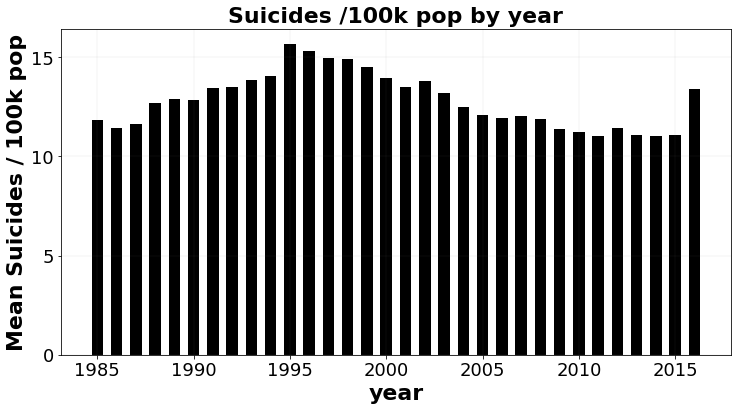

In [9]:
#create function for barplot

def bar_plot_year (x,y,title,xlabel,ylabel):
    '''
    DESCRIPTION: 
    This function is defined to get a barplot showing suicide rates changes with years.
    
    INPUT:
    x: values in x axis. Years in current case
    y: values in y axis. Suicide rates in current case
    xlabel: title for x axis.
    ylabel: title for y axis.
    title: title of the barplot
    
    OUTPUT:
    a bar plot that shows suicide rates with time
    '''
    
    fig,ax=plt.subplots(figsize=(12,6))
    ax.bar(x,y,color='black',width = 0.6)
    ax.grid(b=True,color='grey',alpha=0.3,linewidth=0.3)
    ax.set_title(title,fontsize=22,fontweight='bold')
    plt.xlabel(xlabel,fontsize=22,fontweight='bold')
    plt.ylabel(ylabel,fontsize=22,fontweight='bold')
    plt.xticks(np.arange(min(x),max(x)+1,5),fontsize = 18)
    plt.yticks(np.arange(0,max(y),5),fontsize = 18)
    plt.show()
    fig.savefig("figure 1.jpg")
    
# pass x and y to generate the barplot
bar_plot_year(suicide_year['year'],suicide_year['suicides/100k pop'],'Suicides /100k pop by year','year','Mean Suicides / 100k pop')

### Question 1 visualization summary:

- The world-wide suicides rate fluctuated from 1985 to 2016. 
- Specifically, the suicides rates obviously increased during the five years prior to 21st, and then showed a decreasing trend. 
- However, it again significantly increased in 2016.

### Question 2 : Gender differences in suicide rates with years

To answer this question, I aim to visualize the mean suicide rates with years in both males and females respectively using a line plot, to explore the gender differences in each year.

create lineplot function and get the lineplot for gender difference

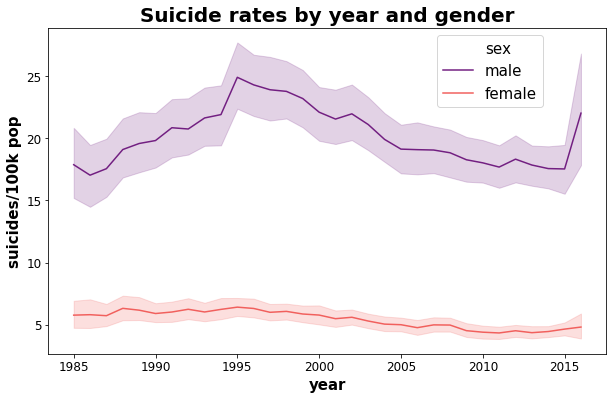

In [10]:
def lineplot_category(df,x,y,factor,title,xlabel,ylabel):
    '''
    DESCRIPTION: 
    This function is defined to get a lineplot showing gender differences in suicide rates in each year.
    
    INPUT:
    df: the dataframe will be used for the plot
    x: the column value in x axis
    y: the column value in y axis
    xlabel: title for x axis.
    ylabel: title for y axis.
    factor: the variable will be used to show different lines in the plot. Usually it is categorical vairable
    title: title of the lineplot
    
    OUTPUT:
    
    A lineplot with different line representing different categories
    
    
    '''
    
    plt.figure(figsize=(10,6))
    g=sns.lineplot(x,y,hue=factor,data=df,estimator='mean',palette="magma",markers=True).set_title(title,fontsize=20,fontweight='bold')
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlabel(xlabel,fontsize=15,fontweight='bold')
    plt.ylabel(ylabel,fontsize=15,fontweight='bold')
    plt.legend(bbox_to_anchor=(0.4,0.2,0.5,0.8), loc='upper right',fontsize=15)
    figure=g.get_figure()
    figure.savefig("Figure 2.jpg")
    
 # pass arguments and get the figure   
lineplot_category(df_new,'year','suicides/100k pop','sex','Suicide rates by year and gender','year','suicides/100k pop')

### Question 2 visualization summary:

- There is a clear trend that males show higher suicide rates than females across the 30 years, and the differences appear significant. 
- The suicide rates in males showed more fluctuation along with time, which is in line with the overall suicide rates changes with years.
- The females showed a relatively stable trend.


### Question 3: How does age affect the suicide rate?

To answer this question, I aim to look into the suicide rates in each age group acorss 30 years in both males and females respectively. Therefore, a facet figure with two lineplots was created.

First, I need prepare necessary data for the plot

In [11]:
# get the age group list

df_new.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [12]:
# re-organize the age order list

age_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']

Create function for the multi-factor lineplots for gender by age

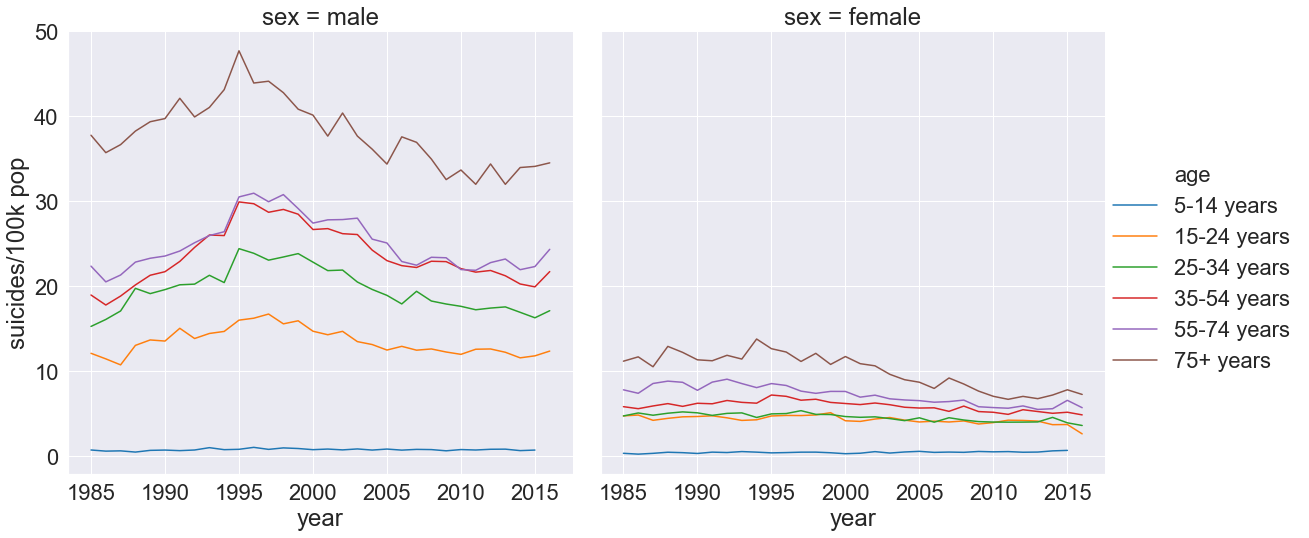

In [13]:
def relplot_multifactor (x,y,df,factor1,factor2,order):
    '''
    DESCRIPTION: 
    This function is defined to get a multi-factors facet lineplot.
    
    INPUT:
    df: the dataframe will be used for the plot
    x: the column value in x axis
    y: the column value in y axis
    factor1: the variable will be used to show different facets in the plot. 
    factor2: the variable will be used to show different lines in each plot facet
    order: the order of factor2 shown in the lineplot
    
    OUTPUT:
    
    A plot with multiple facets defined by one factor showing lineplots representing different categories
    '''
    
    sns.set(font_scale=2,style='darkgrid')
    g=sns.relplot(x = x,y=y,col=factor1,hue=factor2,kind='line',data=df,estimator='mean',ci=None,palette="tab10",
            hue_order=order,height =8, aspect =1)
    g.savefig("age_plot.tiff");
    
# pass arguments and get the figure

relplot_multifactor ('year','suicides/100k pop',df_new,'sex','age',age_order)

### Question 3 visualization summary:

- The trend of age effect in both male and female groups are similar. Specifically, the 75+ years age group shows the highest suicide rate, and the 5–14 years age group shows the lowest suicide rate compared to other age groups.

- In males, the 25–34 years group show obvious higher suicide rate than 15–24 years group, while there is no such difference in females.

- Except the 5–14 years group, males show higher suicide rates than females in every age group. So, visually, there is no interaction effect between age and gender. 

- Furthermore, even the 75+ years group in female group shows lower suicide rates than the 15–24 years group in males.

## correlational analysis

In this section, some simple correlation statistics will be conducted to explore the relationships between numerical variables

### Question 4: Relationship between suicide rates and numerical variables

In this question, I mainly focus on the relationship between the suicide rates and gdp_for_capita ($)



 First, create a dataframe that includes only numerical variables for the further correlation analysis


In [14]:
#select all numerical columns for next correlational analysis
df_corr=df_new[df_new.select_dtypes(include=['float64','int64']).columns]

Create functon for correlational heatmap

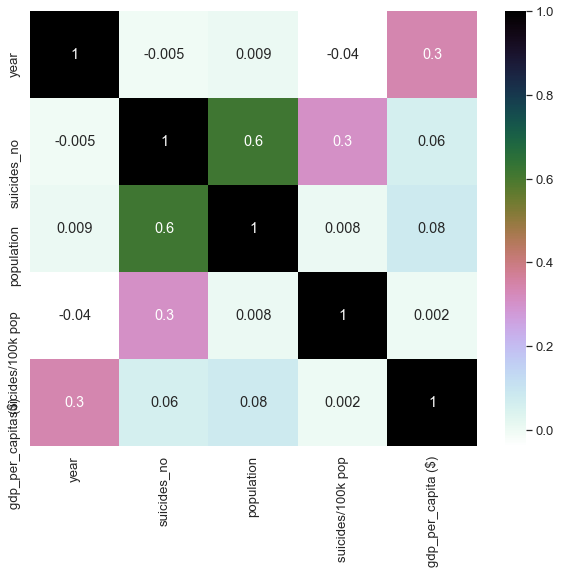

In [15]:
def corr_heatmap(df):
    '''
    DESCRIPTION:
    This function generates a correlational heatmap for a numerical data matrix
    
    INPUT:
    df: the dataframe with all numerical columns used for the correlation computation
    
    OUTPUT:
    a correlational heatmap with correlation coefficients   
    
    '''
    plt.figure(figsize=(10,8))
    sns.set(font_scale=1.2)
    htmp=sns.heatmap(df.corr(),annot=True,fmt='.1g',cmap='cubehelix_r')
    bottom, top = htmp.get_ylim()
    htmp.set_ylim(bottom+0.5, top-0.5)
    figure=htmp.get_figure()
    figure.savefig("Figure 4.jpg",bbox_inches='tight')
    
# pass the argument to get the figure    
corr_heatmap(df_corr)

### Question 4 summary:

- Except the suicide number, the other numerical variables do not appear to correlate with suicide rates. 
- The correlation coefficient between suicide rates and gdp/capita is only 0.002. 
- Basically, we can say that is no directly relationship between suicide rates and economy.

## LinearRegression model fit

### Question 5: Which factors are the best predictors of suicide rates?

Since there is no obvious relationship between numerical variables and suicide rates, then the rest categorical factors might be better predictors. Based on the previous findings, are age and gender the best two predictors? What about countries? To answer these questions, I aim to use linear regression model to investigate all variables and find out which factors are the best predictors of suicide rates. In other words, the suicide rate is the response variable, and all other variables are predictors.


define a function to get clean predictor data matrix, a response vector, and then do the sklearn linearRegression model fit

In [16]:
#create predictor dataframe X and response vector y. Create dummies for all cat_cols in X

def clean_fit_linearmodel(df,response_col,test_size,random_state):
    
    
    '''
    DESCRIPTION:
    This function is defined to 
    1. prepare the clean X data matrix including all predictors
    2. create dummies for all categorical variables in X matrix
    3. create a response vector
    4. split the dataset into train_data and test_data
    5. Fit the linearRegression model
    6. Get the r2 score for both train and test data
    
    df: the dataframe used for the analysis
    response_col: the column used as the response varaible
    test_size: the proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    1. X: the dataframe including all predictors
    2. create dummies for all categorical columns in X,and delete the original columns.
    3. y: response vector
    4. lm_model from sklearn
    5. train_score: r2 score on the train score
    6. test_score: r2 score on the test score
    '''
# create a X data matrix, which excludes the response variable

    X=df.drop([response_col],axis=1)
    
# create the response vector
    y=df[response_col]
    
# create dummies for categorical variables in X matrix

    cat_cols=X.select_dtypes(include=['object']).copy().columns
    for col in cat_cols:
        X = pd.concat([X.drop(col,axis=1),pd.get_dummies(X[col],prefix=col,prefix_sep='_',drop_first=True,dummy_na=False)],axis=1)
        
# split the dataset into train data and test data
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=random_state)
    
# initiate the linearRegression model
    
    lm_model=LinearRegression(normalize=True)
    
# fit the lm model using train dataset
    lm_model.fit(X_train,y_train)
    y_train_preds=lm_model.predict(X_train)
    y_test_preds=lm_model.predict(X_test)
    
# get the r2 score of train dataset and test dataset
    train_score=r2_score(y_train,y_train_preds)
    test_score=r2_score(y_test,y_test_preds)
    print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))
    
    return X,y,X_train,y_train,X_test,y_test,lm_model

# pass the arguments to get the final results

X,y,X_train,y_train,X_test,y_test,lm_model =clean_fit_linearmodel(df_new,'suicides/100k pop',0.3,42)


The rsquared on the training data was 0.5518061726684329.  The rsquared on the test data was 0.5398306148087779.


In [24]:
# check the train_score and test_score
print(train_score,test_score)

0.5518061726684329 0.5398306148087779


The results showed that the r-squared score on the training data was 0.55, and the r-squared score on the test data was 0.54. Overall, this model fits well.

Finally,I intended to list the top 50 predictors of suicide

In [20]:
def coef_weights(coefficients,X_train):
    '''
    INPUTS:
    coefficients: the coefficients of the above linear model
    X_train: the training dataset
    
    OUTPUTS:
    coefs_df: a dataframe that can be used to understand the model influential coefficients
    '''
    coefs_df=pd.DataFrame()
    coefs_df['est_int']=X_train.columns
    coefs_df['coefs']=lm_model.coef_
    coefs_df['abs_coefs']=np.abs(lm_model.coef_)
    coefs_df=coefs_df.sort_values('abs_coefs',ascending=False)
    return coefs_df

# pass arguments to the function and get the coefs_df
coef_df=coef_weights(lm_model.coef_,X_train)

# list the Top 50 predictors
coef50=coef_df.head(50)
coef50

,est_int,coefs,abs_coefs
55,country_Lithuania,37.485137,37.485137
90,country_Sri Lanka,31.922419,31.922419
54,country_Latvia,28.714357,28.714357
43,country_Hungary,28.602130,28.602130
14,country_Belarus,27.908807,27.908807
87,country_Slovenia,27.153924,27.153924
50,country_Kazakhstan,26.448476,26.448476
33,country_Estonia,24.958765,24.958765
9,country_Austria,23.850002,23.850002
35,country_Finland,23.612371,23.612371


In [25]:
# save the results into a csv file
coef50.to_csv("coef50.csv")

### Question 5 summary

- Among the top 50 predictors, most of them are countries, and all of them showed positive coefficient values.
- Males and 75+ years were listed in the top 50, which is consistent with the previous findings.
- Aamong the top 25 countries, there are some with good economic environment and welfare, such as Finland, Switzerland, France, Japan, Singapore, United States etc. Again, it indicated that the economy does not influence the suicide rates directly.

# Conclusion

- The world suicide rates fluctuate up and down across the recent three decades, but it is never below 10.
- Males show times higher suicide rates than females, and this trend exists in all age groups. This alerts us that more attention needs be paid to males’ mental health.
- 75+ years age group shows the highest suicide rate among all age groups for both males and females. This reminds us that elderly people with relatively poor life quality are facing higher suicide risk.
- Overall, countries appear to be the best predictors of suicide rates, but it seems nothing to do with the countries’ economy. Therefore, for each country, there should be other specific factors associated with suicide rates, which is not reflected in the current dataset. Further research is needed to find out these underlying factors.